# 빅데이터수집및마이닝 과제

<ipython-input-1-5f79fd49e6d3>:25: RuntimeWarning: invalid value encountered in true_divide
  away = np.array(row[209:], dtype=int)/int(row[208])


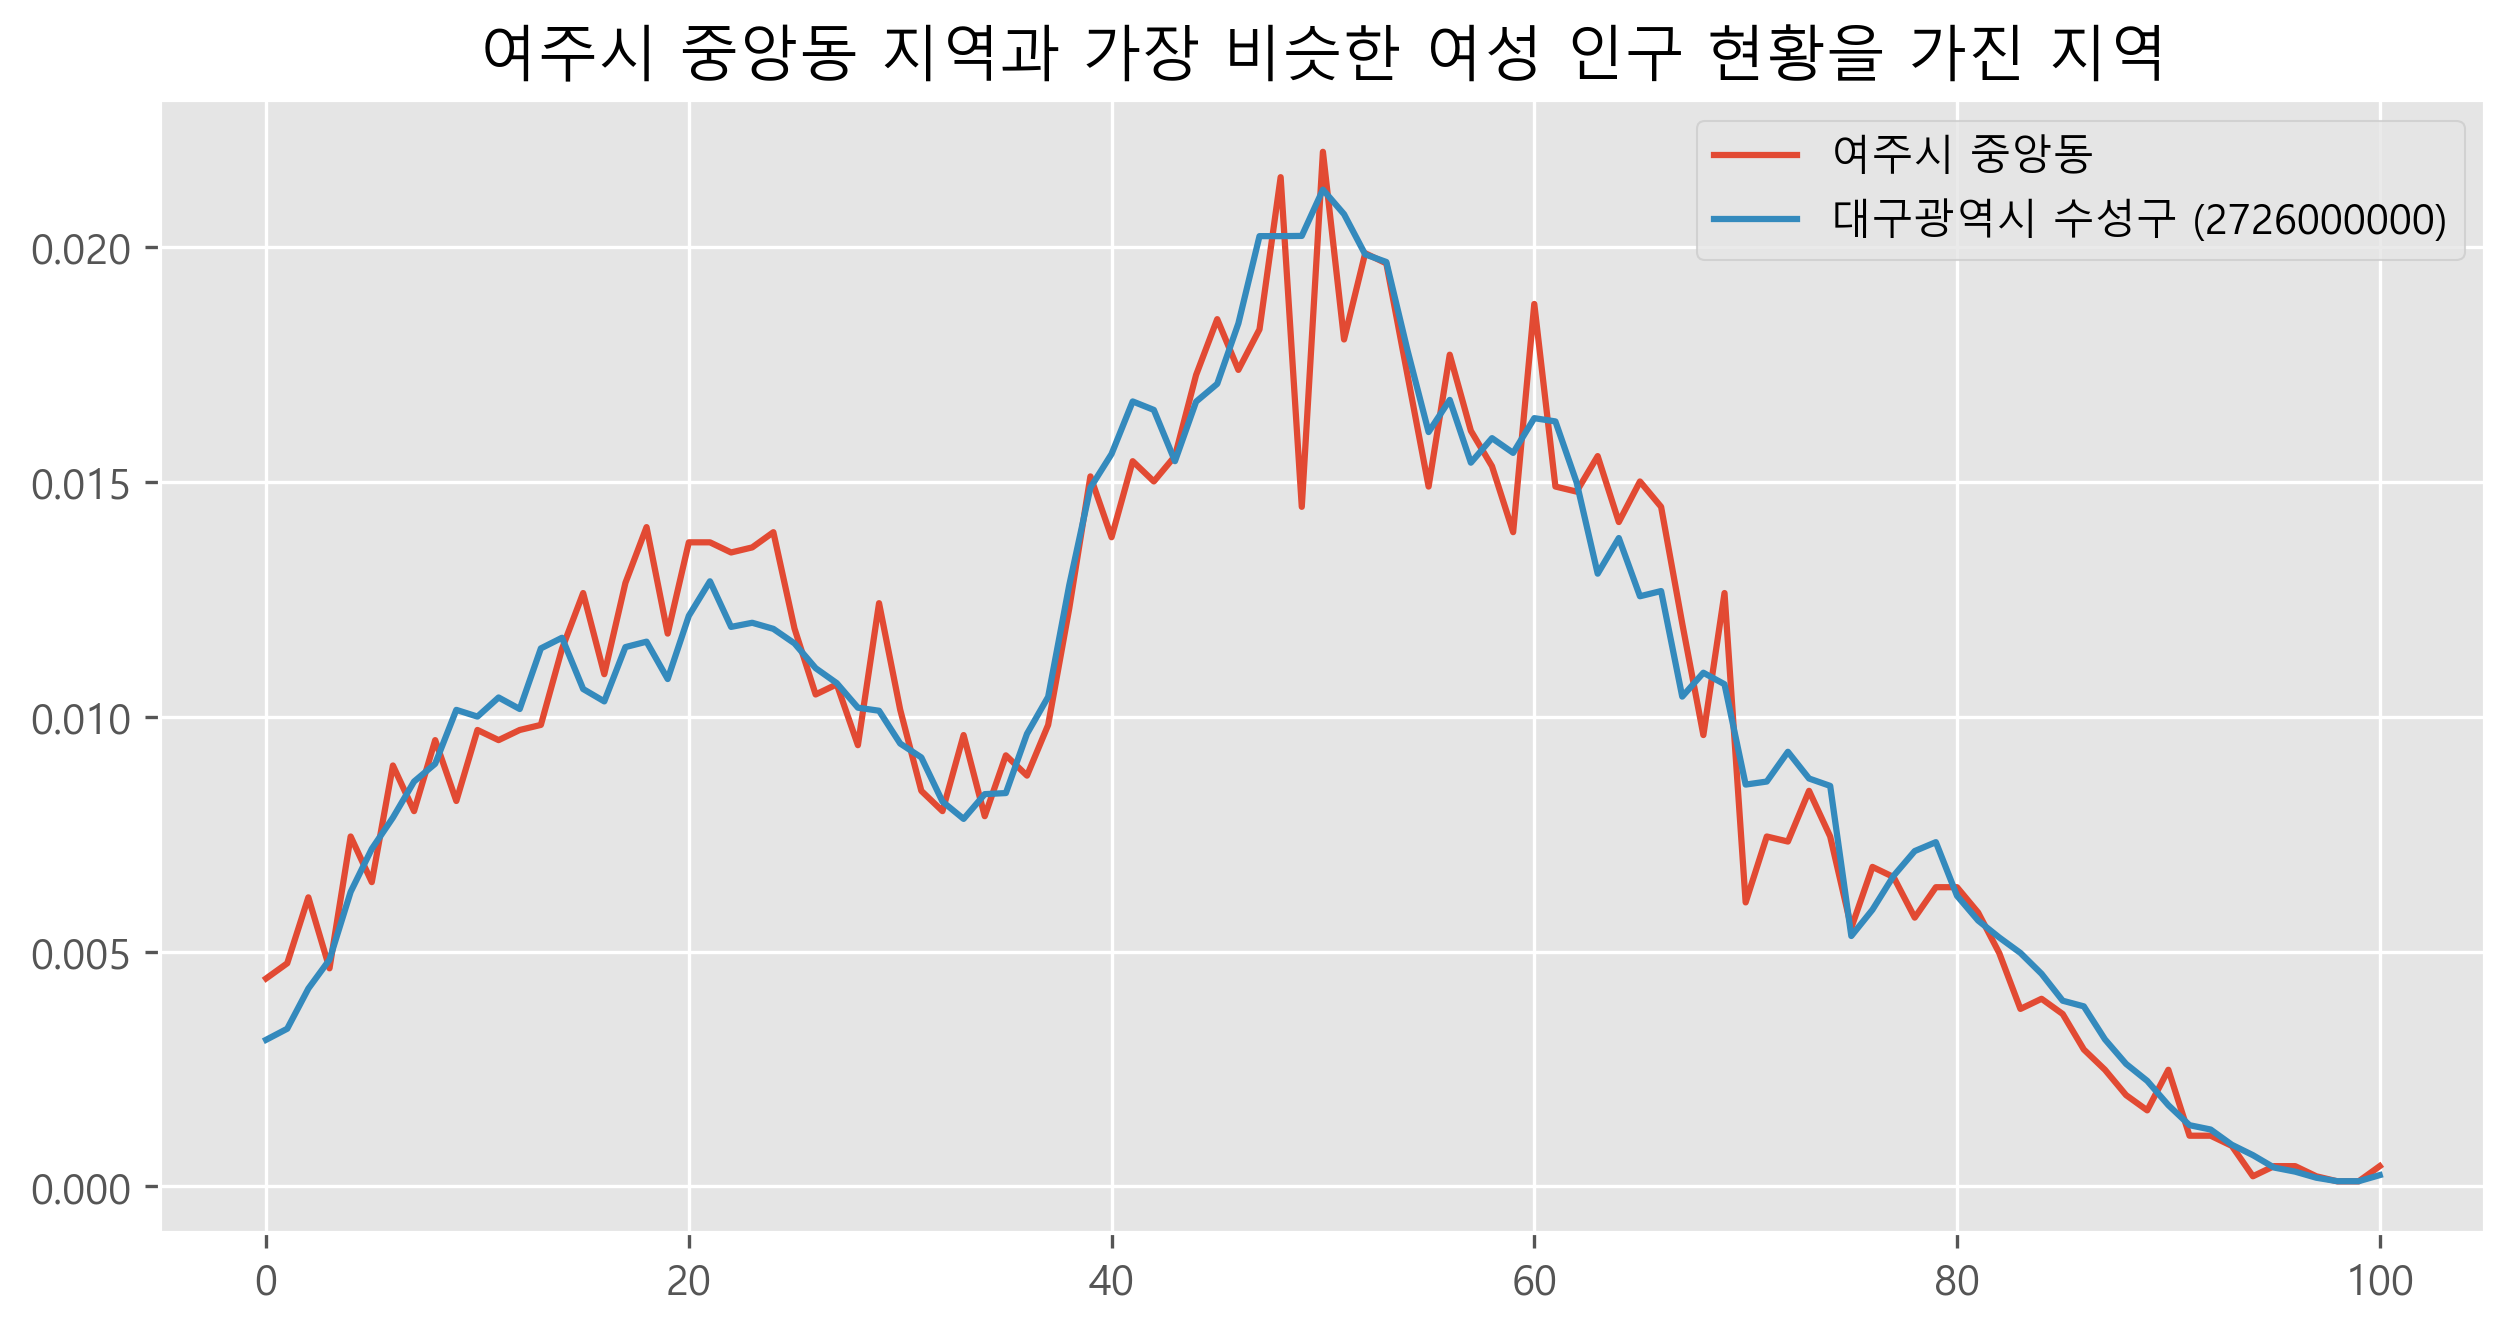

In [1]:
## 여성 인구 구조가 가장 비슷한 지역의 여성 인구 현황 그래프

import numpy as np
import csv

# 데이터 불러오기
f = open('female.csv', encoding='utf-8')
data = csv.reader(f)
next(data)
data = list(data)

# 내 지역
name = '여주시 중앙동'
mn = 1
result_name = ''
result = 0

# 내 지역 인구 구조 저장
for row in data:
    if name in row[0]:
        home = np.array(row[209:], dtype=int)/int(row[208]) # 여성 총인구수로 나누기

# 비슷한 인구 구조 가진 지역 찾기
for row in data:
    away = np.array(row[209:], dtype=int)/int(row[208])
    s = np.sum((home-away)**2)
    if s < mn and name not in row[0]:
        mn = s
        result_name = row[0]
        result = away
        
# 시각화하기
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10,5), dpi=300)
plt.rc('font', family='Malgun Gothic')
plt.title(name + ' 지역과 가장 비슷한 여성 인구 현황을 가진 지역')
plt.plot(home, label=name)
plt.plot(result, label=result_name)
plt.legend()
plt.savefig('여성 인구 현황.png') #사진 저장
plt.show()